## imports required for this testing

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import random
from xgboost import XGBClassifier
from scipy.stats import gamma
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape
from tensorflow.keras.utils import to_categorical

## Importing data and processing it

In [169]:
df = pd.read_csv("C:/Users/Administrator/Desktop/PROJECT-DEFECT_PREDICTION_EXTENSION/DATASET/CM1.csv")
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False


In [171]:
X = df.drop(['defects'], axis=1)
y = df['defects']

In [173]:
X

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,163.15,1,0,6,0,15.0,15.0,44.0,19.0,9.0
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,191.55,0,0,3,0,16.0,8.0,31.0,16.0,7.0
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,47.0,3.0,1.0,3.0,256.0,1563.78,0.04,28.00,55.85,43785.90,...,2432.55,2,13,2,0,23.0,46.0,144.0,112.0,5.0
494,24.0,4.0,3.0,3.0,107.0,587.63,0.05,19.13,30.72,11241.58,...,624.53,1,7,4,0,22.0,23.0,67.0,40.0,7.0
495,82.0,11.0,3.0,10.0,475.0,3155.83,0.02,44.71,70.59,141084.24,...,7838.01,9,59,35,0,32.0,68.0,285.0,190.0,21.0
496,10.0,2.0,1.0,1.0,32.0,150.41,0.15,6.50,23.14,977.69,...,54.32,1,12,4,0,13.0,13.0,19.0,13.0,3.0


In [175]:
y

0      False
1       True
2      False
3      False
4      False
       ...  
493     True
494     True
495     True
496     True
497     True
Name: defects, Length: 498, dtype: bool

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [179]:
ACCURACY, PRECISION, RECALL, AUC, F1 = [], [], [], [], []


C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
           Model  Accuracy  Precision  Recall  F1 Score       AUC
0  Random Forest  0.873333    0.00000   0.000  0.000000  0.612407
1     GaussianNB  0.853333    0.20000   0.125  0.153846  0.720849
2       AdaBoost  0.866667    0.00000   0.000  0.000000  0.712687
3            MLP  0.613333    0.16129   0.625  0.256410  0.598414
4            KNN  0.873333    0.00000   0.000  0.000000  0.581623
5            CNN  0.893333    0.00000   0.000  0.000000  0.686101


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


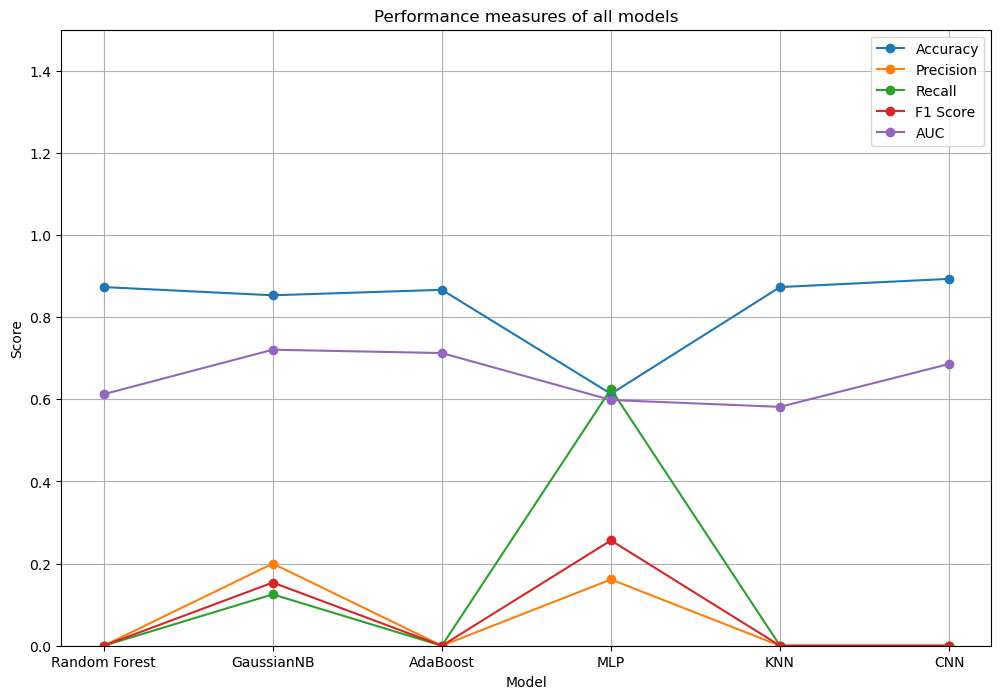

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Sequential
from keras.layers import Conv1D, GlobalAveragePooling1D, Dropout, Dense, Reshape
from keras.utils import to_categorical

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the list to store results
results = []

# Random Forest model evaluation
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

# Append the results to the list
results.append(['Random Forest', accuracy, precision, recall, f1, auc])

# Repeat similar steps for other models (GaussianNB, AdaBoost, MLP, KNN, CNN)
# GaussianNB model evaluation
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
auc = roc_auc_score(y_test, gnb.predict_proba(X_test)[:, 1]) 
results.append(['GaussianNB', accuracy, precision, recall, f1, auc])

# AdaBoost model evaluation
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, ada.predict_proba(X_test)[:, 1]) 
results.append(['AdaBoost', accuracy, precision, recall, f1, auc])

# MLP model evaluation
mlp = MLPClassifier(max_iter=300)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
auc = roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1]) 
results.append(['MLP', accuracy, precision, recall, f1, auc])

# KNN model evaluation
X_train_contiguous = np.ascontiguousarray(X_train)
X_test_contiguous = np.ascontiguousarray(X_test)
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
# Fit the classifier
knn.fit(X_train_contiguous, y_train)
# Make predictions
y_pred = knn.predict(X_test_contiguous)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
y_prob = knn.predict_proba(X_test_contiguous)
auc = roc_auc_score(y_test, y_prob[:, 1])
results.append(['KNN', accuracy, precision, recall, f1, auc])

# CNN model evaluation
input_shape = X_train.shape[1]
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

model = Sequential()
model.add(Reshape((input_shape, 1), input_shape=(input_shape,)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train.astype('float64'), epochs=10, batch_size=64, verbose=0)
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
y_pred_proba = model.predict(X_test)
auc = roc_auc_score(y_test, y_pred_proba)
results.append(['CNN', accuracy, precision, recall, f1, auc])

# Convert the results to a DataFrame
metrics_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC"])

# Print the DataFrame
print(metrics_df)

plt.figure(figsize=(12, 8))

for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']:
    plt.plot(metrics_df['Model'], metrics_df[metric], marker='o', label=metric)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance measures of all models')
plt.ylim(0.0, 1.5)
plt.legend()
plt.grid(True)

plt.show()


## Random forest algorithm

In [47]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
ACCURACY.append(accuracy)


# Calculate precision
precision = precision_score(y_test, y_pred)
PRECISION.append(precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
RECALL.append(recall)

# Calculate f1 score
f1 = f1_score(y_test, y_pred)
F1.append(f1)

auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
AUC.append(auc)

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1)
print("AUC score:",auc)

Accuracy: 0.8666666666666667
Precision: 0.0
Recall: 0.0
F1 score: 0.0
AUC score: 0.7348414179104478


## GaussianNB 

In [50]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
ACCURACY.append(accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
PRECISION.append(precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
RECALL.append(recall)


# Calculate f1 score
f1 = f1_score(y_test, y_pred)
F1.append(f1)

# Calculate AUC score
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
AUC.append(auc)
print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1)
print("AUC score:",auc)

Accuracy: 0.8533333333333334
Precision: 0.2
Recall: 0.125
F1 score: 0.15384615384615385
AUC score: 0.7208488805970149


## AdaBoostClassifier


In [53]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
ACCURACY.append(accuracy)
# print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
PRECISION.append(precision)
# print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
RECALL.append(recall)

# print("Recall:", recall)

# Calculate f1 score
f1 = f1_score(y_test, y_pred)
F1.append(f1)
# print("F1 Score:", f1)

# Calculate AUC score
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
AUC.append(auc)
print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1)
print("AUC score:",auc)


Accuracy: 0.8733333333333333
Precision: 0.2
Recall: 0.0625
F1 score: 0.09523809523809523
AUC score: 0.7406716417910447


## MLPClassifier

In [56]:
lf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# print("Multi Layer Perceptron\n")
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
PRECISION.append(precision)
ACCURACY.append(accuracy)
# print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
# print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
RECALL.append(recall)

# print("Recall:", recall)

# Calculate f1 score
f1 = f1_score(y_test, y_pred)
F1.append(f1)
# print("F1 Score:", f1)

# Calculate AUC score
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
AUC.append(auc)

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1)
print("AUC score:",auc)

Accuracy: 0.8733333333333333
Precision: 0.2
Recall: 0.0625
F1 score: 0.09523809523809523
AUC score: 0.7406716417910447


## Kneighbourclassifier

In [62]:
clf = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
clf.fit(X_train, y_train)

# Make predictions on the testing set

y_pred = clf.predict(np.array(X_test))

# print("KNeighbors Classifier\n")
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
ACCURACY.append(accuracy)
# print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
PRECISION.append(precision)
# print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
RECALL.append(recall)
# print("Recall:", recall)

# Calculate f1 score
f1 = f1_score(y_test, y_pred)
F1.append(f1)
# print("F1 Score:", f1)

# Calculate AUC score
auc = roc_auc_score(y_test, clf.predict_proba(np.array(X_test))[:, 1])
AUC.append(auc)

print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1)
print("AUC score:",auc)

Accuracy: 0.8733333333333333
Precision: 0.0
Recall: 0.0
F1 score: 0.0
AUC score: 0.5816231343283582


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## CNN 

In [74]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D

input_shape = X_train.shape[1]

model_m = Sequential()
model_m.add(Reshape((input_shape, 1), input_shape=(input_shape,)))
model_m.add(Conv1D(100, input_shape, activation='relu'))

# model_m.add(Conv1D(100, 11, activation='relu'))
# model_m.add(MaxPooling1D(1))
# model_m.add(Conv1D(160, 3, activation='relu'))
# model_m.add(Conv1D(160, 3, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(1, activation='tanh'))
##print(model_m.summary())
model_m.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['accuracy'])

y_train.astype('float64')
EPOCHS = 100
BATCH_SIZE = 64
history = model_m.fit(X_train,
                      y_train.astype('float64'),
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      verbose=1)

# print(model_m.summary())

accuracies = history.history['accuracy']

# Compute the average accuracy across all epochs
avg_accuracy = sum(accuracies) / len(accuracies)

accuracies = history.history['accuracy']
avg_accuracy = sum(accuracies) / len(accuracies)
print("Accuracy:",avg_accuracy)

Epoch 1/100


C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5186 - loss: 6.5199  
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8727 - loss: 1.8455 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8833 - loss: 1.7822 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9025 - loss: 1.5611 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8812 - loss: 1.8700 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9033 - loss: 1.5321 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9052 - loss: 1.5333 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8966 - loss: 1.6542 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9137 - loss: 1.4269 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9102 - loss: 1.4524 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8988 - loss: 1.6211 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9148 - loss: 1.3947 


In [76]:
avg_precision = sum(PRECISION) / len(PRECISION)
avg_recall = sum(RECALL) / len(RECALL)
avg_f1 = sum(F1) / len(F1)
avg_auc = sum(AUC) / len(AUC)
print(avg_auc, AUC)
ACCURACY.append(avg_accuracy)
PRECISION.append(avg_precision)
RECALL.append(avg_recall)
F1.append(avg_f1)
AUC.append(avg_auc)

0.7007229477611941 [0.7047574626865671, 0.7208488805970149, 0.7406716417910447, 0.7406716417910447, 0.7348414179104478, 0.7208488805970149, 0.7406716417910447, 0.7406716417910447, 0.5816231343283582, 0.5816231343283582, 0.7007229477611941]


In [78]:
output_loc = ''

rows = {'Algorithm': ['Random\nForest', ' Gaussian NB', ' Adaboost', ' MLP', ' KNN', ' CNN'],
        'Accuracy': ACCURACY,
        'Precision': PRECISION,
        'Recall': RECALL,
        'F1': F1,
        'AUC': AUC}


In [80]:
algorithms  = ['Random Forest', ' Gaussian NB', ' Adaboost', ' MLP', ' KNN', ' CNN'] 
count = 0
for algo in algorithms: 
    print(f'{algo}: {ACCURACY[count]} ,{PRECISION[count]}, {RECALL[count]}, {F1[count]}, {AUC[count]}')
    count+=1


Random Forest: 0.8666666666666667 ,0.0, 0.0, 0.0, 0.7047574626865671
 Gaussian NB: 0.8533333333333334 ,0.2, 0.125, 0.15384615384615385, 0.7208488805970149
 Adaboost: 0.8733333333333333 ,0.2, 0.0625, 0.09523809523809523, 0.7406716417910447
 MLP: 0.8733333333333333 ,0.2, 0.0625, 0.09523809523809523, 0.7406716417910447
 KNN: 0.8666666666666667 ,0.0, 0.0, 0.0, 0.7348414179104478
 CNN: 0.8533333333333334 ,0.2, 0.125, 0.15384615384615385, 0.7208488805970149


## PCA implementation

In [ ]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)
x_scaled

In [ ]:
pca=PCA(n_components=10)
x_pca=pca.fit_transform(X)
x_pca.shape

In [ ]:
pca.explained_variance_ratio_


In [ ]:
pca.n_components_


In [ ]:
x_train_pca,x_test_pca,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=42)


### random forest with PCA

In [ ]:
model=RandomForestClassifier()
model.fit(x_train_pca,y_train)
model.score(x_test_pca,y_test)

### Logistic Regression with PCA

In [ ]:

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(x_train_pca,y_train)
model.score(x_test_pca,y_test)

### CNN with PCA

In [ ]:
input_shape = x_train_pca.shape[1]
input_shape

In [ ]:
model_m = Sequential()
model_m.add(Reshape((input_shape, 1), input_shape=(input_shape,)))  # Reshape input for Conv1D
model_m.add(Conv1D(100, 3, activation='relu'))  # Example Conv1D layer
model_m.add(GlobalAveragePooling1D())  # GlobalAveragePooling1D layer
model_m.add(Dropout(0.5))
model_m.add(Dense(1, activation='tanh'))

model_m.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['accuracy'])

EPOCHS = 100
BATCH_SIZE = 64
history = model_m.fit(x_train_pca, y_train.astype('float64'),
                      batch_size=BATCH_SIZE, epochs=EPOCHS,
                      verbose=1)

accuracies = history.history['accuracy']
avg_accuracy = sum(accuracies) / len(accuracies)

In [ ]:
print(avg_accuracy)


## Gaussian NB with PCA

In [ ]:
model=GaussianNB()
model.fit(x_train_pca,y_train)
model.score(x_test_pca,y_test)

## AdaBoost Classifier with PCA 

In [ ]:

model=AdaBoostClassifier(n_estimators=100)
model.fit(x_train_pca,y_train)
y_pred = model.predict(x_test_pca)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

## MLP Classifier with PCA 

In [ ]:
model=MLPClassifier(random_state=1,max_iter=300)
model.fit(x_train_pca,y_train)
y_pred=model.predict(x_test_pca)
accuracy = accuracy_score(y_test, y_pred)
accuracy

## Kneighbour Classifier with PCA

In [ ]:
model=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
model.fit(x_train_pca,y_train)
y_pred=model.predict(x_test_pca)
accuracy = accuracy_score(y_test, y_pred)
accuracy

## bat algorithm 


In [155]:
def bat_algorithm(X_train, X_test, y_train, y_test, A, r, Qmin, Qmax, N, alpha, gamma, fmin, fmax, max_iter):
    # Initialize the population of bats
    f = np.zeros(N)
    v = np.zeros((N, X_train.shape[1]))
    x = np.zeros((N, X_train.shape[1]))
    for i in range(N):
        x[i] = np.random.uniform(0, 1, X_train.shape[1])
    print("understanding of the bat algorithm starts here!!!!!")


    # Find the initial best solution
    best_solution = np.zeros(X_train.shape[1])
    best_fitness = float('-inf')
    print(f"Features selected by Bat algorithm: {X_train.shape[1]} \n")
    print(list(X_train.columns))
    fitness_values = []  # List to store fitness values for plotting
    stagnation_counter = 0  # Counter to track stagnation of fitness improvement
    for i in range(N):
        if np.random.uniform(0, 1) > r:
            f[i] = fmin + (fmax - fmin) * np.random.uniform(0, 1)
            v[i] = v[i] + (x[i] - best_solution) * f[i]
            x_new = x[i] + v[i]
            x_new = np.clip(x_new, 0, 1)
            if np.random.uniform(0, 1) < A:
                j = np.random.randint(0, N)
                x_new = x_new + alpha * (x[j] - x[i])
            y_pred = train_and_predict(X_train, X_test, y_train, x_new)
            fitness = calculate_fitness(y_test, y_pred)
            if fitness > f[i] and np.random.uniform(0, 1) < gamma:
                x[i] = x_new
                f[i] = fitness
            if fitness > best_fitness:
                best_fitness = fitness
                best_solution = x_new
            fitness_values.append(fitness)  # Append fitness value for plotting
            print(f"Fitness for loop {i}: {fitness}")

    outer_break = 0
    # Continue the optimization process
    for t in range(1, max_iter):
        for i in range(N):
            f[i] = fmin + (fmax - fmin) * np.random.uniform(0, 1)
            v[i] = v[i] + (x[i] - best_solution) * f[i]
            x_new = x[i] + v[i]
            x_new = np.clip(x_new, 0, 1)
            if np.random.uniform(0, 1) < A:
                j = np.random.randint(0, N)
                x_new = x_new + alpha * (x[j] - x[i])
            y_pred = train_and_predict(X_train, X_test, y_train, x_new)
            fitness = calculate_fitness(y_test, y_pred)
            if fitness > f[i] and np.random.uniform(0, 1) < gamma:
                x[i] = x_new
                f[i] = fitness

            if fitness > best_fitness:
                best_fitness = fitness
                best_solution = x_new

            # Select the best features
            selected_features = best_solution > 0.5

            # Train a logistic regression model with the selected features
            X_train_selected = X_train.loc[:, selected_features]
            X_test_selected = X_test.loc[:, selected_features]
            model = LogisticRegression(random_state=42)
            model.fit(X_train_selected, y_train)

    # Calculate the accuracy of the model
            y_pred = model.predict(X_test_selected)
            accuracy = accuracy_score(y_test, y_pred)

        
            # Check for fitness stagnation
            if len(fitness_values) > 4 and all(fitness_values[-1] <= val for val in fitness_values[-4:]):
                stagnation_counter += 1
                if stagnation_counter >= 3:
                    print("Fitness stagnation detected. Terminating optimization loop.")
                    outer_break = 1
                    break
            else:
                stagnation_counter = 0
        if outer_break == 1:
            break
        # Append fitness value for plotting
        fitness_values.append(best_fitness)


    # Plot the fitness values
    plt.plot(fitness_values)
    plt.xlabel('Iteration')
    plt.ylabel('Fitness')
    plt.title('Fitness Evolution')
    plt.show()

    return accuracy, selected_features


In [157]:
def train_and_predict(X_train, X_test, y_train, features):
    # Select the features to use for training
    selected_features = features.astype(bool)
    X_train_selected = X_train.loc[:, selected_features]
    X_test_selected = X_test.loc[:, selected_features]

    # Train a logistic regression model
    model = LogisticRegression(random_state=42, max_iter=1000,solver='lbfgs')
    model.fit(X_train_selected, y_train)


    # Predict the target variable for the test data
    y_pred = model.predict(X_test_selected)

    return y_pred

def calculate_fitness(y_true, y_pred):
# Calculate the accuracy of the predicted target variable
    return accuracy_score(y_true, y_pred)

understanding of the bat algorithm starts here!!!!!
Features selected by Bat algorithm: 8 

['v(g)', 'l', 'i', 'e', 'b', 't', 'uniq_Op', 'branchCount']
Fitness for loop 1: 0.86
Fitness for loop 2: 0.86
Fitness for loop 3: 0.86
Fitness for loop 7: 0.86
Fitness for loop 8: 0.86
Fitness for loop 10: 0.86
Fitness for loop 11: 0.86
Fitness for loop 13: 0.86
Fitness for loop 19: 0.86
Fitness for loop 23: 0.86
Fitness for loop 26: 0.86
Fitness for loop 27: 0.86
Fitness stagnation detected. Terminating optimization loop.


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

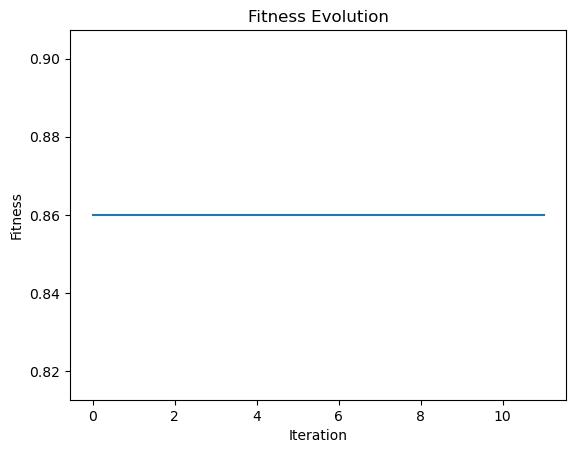

In [159]:
Qmin = 0
A = 0.5
r = 0.5
Qmax = 2
N = 30
alpha = 0.9
gamma = 0.1
fmin = 0
fmax = 1
max_iter = 10

bat_accuracy, bat_selected_features = bat_algorithm(X_train, X_test, y_train, y_test, A, r, Qmin, Qmax, N, alpha, gamma, fmin, fmax, max_iter)


## hho hyperparameter optimisation with XGBClassifier

- selecting features from bat and sending it to HHO + XGB

In [101]:
# extracting the selected features 
selected_columns = X.columns[bat_selected_features]
filtered_x = X[selected_columns]
filtered_x

,v(g),l,i,e,b,t,uniq_Op,branchCount
0,1.4,1.30,1.30,1.30,1.30,1.30,1.2,1.4
1,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.0
2,5.0,0.11,32.54,2936.77,0.10,163.15,15.0,9.0
3,4.0,0.06,13.47,3447.89,0.07,191.55,16.0,7.0
4,6.0,0.06,19.97,5999.58,0.12,333.31,16.0,11.0
...,...,...,...,...,...,...,...,...
493,3.0,0.04,55.85,43785.90,0.52,2432.55,23.0,5.0
494,4.0,0.05,30.72,11241.58,0.20,624.53,22.0,7.0
495,11.0,0.02,70.59,141084.24,1.05,7838.01,32.0,21.0
496,2.0,0.15,23.14,977.69,0.05,54.32,13.0,3.0


In [103]:
X_train, X_test, y_train, y_test = train_test_split(filtered_x, y, test_size=0.3, random_state=42)


In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from xgboost import XGBClassifier

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Instantiate and train the model
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate AUC
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


Accuracy: 0.88
Precision: 0.375
Recall: 0.1875
AUC: 0.7313432835820894
F1 Score: 0.25


## HHO + CNN ensemble

In [120]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, GlobalAveragePooling1D, Dropout, Dense, Reshape
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have X_train, X_test, y_train, y_test already defined
input_shape = X_train.shape[1]

# Define fitness function for CNN
def fitness_function(hyperparameters):
    model = Sequential()
    model.add(Reshape((input_shape, 1), input_shape=(input_shape,)))
    model.add(Conv1D(filters=int(hyperparameters['filters']), kernel_size=3, activation='relu'))
    model.add(GlobalAveragePooling1D())
    model.add(Dropout(hyperparameters['dropout']))
    model.add(Dense(units=int(hyperparameters['dense_units']), activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(X_train, y_train.astype('float64'), epochs=10, batch_size=64, verbose=0)

    _, accuracy = model.evaluate(X_test, y_test, verbose=0)

    return accuracy

# Define search space for CNN hyperparameters
search_space = {
    'filters': [16, 32, 64, 128],
    'dense_units': [64, 128, 256, 512],
    'dropout': [0.1, 0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.01, 0.1, 0.2]
}

# Define HHO parameters
population_size = 20
max_iterations = 10

# Initialize population of solutions (harmony vectors)
def initialize_population(search_space, population_size):
    population = []
    for _ in range(population_size):
        solution = {}
        for param, values in search_space.items():
            solution[param] = np.random.choice(values)
        population.append(solution)
    return population

# Define harmony search operator
def harmony_search(harmony, search_space):
    new_harmony = {}
    for param, value in harmony.items():
        if np.random.rand() < 0.5:
            new_harmony[param] = np.random.choice(search_space[param])
        else:
            new_harmony[param] = value
    return new_harmony

# Define hawks optimization operator
def hawks_optimization(hawk, search_space):
    new_hawk = {}
    for param, value in hawk.items():
        new_hawk[param] = value + np.random.normal(0, 0.1)
        if param in ['filters', 'dense_units']:  # Ensure these values remain integers within the search space
            new_hawk[param] = int(np.clip(new_hawk[param], min(search_space[param]), max(search_space[param])))
        else:
            new_hawk[param] = np.clip(new_hawk[param], min(search_space[param]), max(search_space[param]))
    return new_hawk

# Main HHO optimization loop
population = initialize_population(search_space, population_size)
best_solution = None
best_fitness = -np.inf

for iteration in range(max_iterations):
    for i in range(len(population)):
        # Apply harmony search operator
        population[i] = harmony_search(population[i], search_space)
        # Apply hawks optimization operator
        population[i] = hawks_optimization(population[i], search_space)
    
    # Evaluate fitness of each solution
    fitness_scores = [fitness_function(solution) for solution in population]
    
    # Update best solution
    best_solution_index = np.argmax(fitness_scores)
    if fitness_scores[best_solution_index] > best_fitness:
        best_solution = population[best_solution_index]
        best_fitness = fitness_scores[best_solution_index]
    
    print(f"Iteration {iteration+1}: Best Fitness = {best_fitness}, Best Solution = {best_solution}")

print("Optimization finished.")
print("Best solution:", best_solution)
print("Best fitness:", best_fitness)

# Create an ensemble of models using the best hyperparameters
def create_model(hyperparameters):
    model = Sequential()
    model.add(Reshape((input_shape, 1), input_shape=(input_shape,)))
    model.add(Conv1D(filters=int(hyperparameters['filters']), kernel_size=3, activation='relu'))
    model.add(GlobalAveragePooling1D())
    model.add(Dropout(hyperparameters['dropout']))
    model.add(Dense(units=int(hyperparameters['dense_units']), activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train multiple models and form an ensemble
num_ensemble_models = 5
ensemble_models = []

for _ in range(num_ensemble_models):
    model = create_model(best_solution)
    model.fit(X_train, y_train.astype('float64'), epochs=10, batch_size=64, verbose=0)
    ensemble_models.append(model)

# Evaluate the ensemble model
ensemble_predictions = ensemble_predict(ensemble_models, X_test)
ensemble_accuracy = accuracy_score(y_test, (ensemble_predictions > 0.5).astype(int))
print("Ensemble accuracy:", ensemble_accuracy)

# Combine predictions from the ensemble
def ensemble_predict(models, X):
    predictions = np.array([model.predict(X) for model in models])
    ensemble_prediction = np.mean(predictions, axis=0)
    return ensemble_prediction

C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\resh

Iteration 1: Best Fitness = 0.8933333158493042, Best Solution = {'filters': 16, 'dense_units': 255, 'dropout': 0.3138432397163239, 'learning_rate': 0.001}


C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\resh

Iteration 2: Best Fitness = 0.8933333158493042, Best Solution = {'filters': 16, 'dense_units': 255, 'dropout': 0.3138432397163239, 'learning_rate': 0.001}


C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\resh

Iteration 3: Best Fitness = 0.8933333158493042, Best Solution = {'filters': 16, 'dense_units': 255, 'dropout': 0.3138432397163239, 'learning_rate': 0.001}


C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\resh

Iteration 4: Best Fitness = 0.8933333158493042, Best Solution = {'filters': 16, 'dense_units': 255, 'dropout': 0.3138432397163239, 'learning_rate': 0.001}


C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\resh

Iteration 5: Best Fitness = 0.8933333158493042, Best Solution = {'filters': 16, 'dense_units': 255, 'dropout': 0.3138432397163239, 'learning_rate': 0.001}


C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\resh

Iteration 6: Best Fitness = 0.8933333158493042, Best Solution = {'filters': 16, 'dense_units': 255, 'dropout': 0.3138432397163239, 'learning_rate': 0.001}


C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\resh

Iteration 7: Best Fitness = 0.8933333158493042, Best Solution = {'filters': 16, 'dense_units': 255, 'dropout': 0.3138432397163239, 'learning_rate': 0.001}


C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\resh

Iteration 8: Best Fitness = 0.8933333158493042, Best Solution = {'filters': 16, 'dense_units': 255, 'dropout': 0.3138432397163239, 'learning_rate': 0.001}


C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\resh

Iteration 9: Best Fitness = 0.8933333158493042, Best Solution = {'filters': 16, 'dense_units': 255, 'dropout': 0.3138432397163239, 'learning_rate': 0.001}


C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\resh

Iteration 10: Best Fitness = 0.8933333158493042, Best Solution = {'filters': 16, 'dense_units': 255, 'dropout': 0.3138432397163239, 'learning_rate': 0.001}
Optimization finished.
Best solution: {'filters': 16, 'dense_units': 255, 'dropout': 0.3138432397163239, 'learning_rate': 0.001}
Best fitness: 0.8933333158493042


C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\resh

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001F0B1AD9DA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Ensemble accuracy: 0.8933333333333333
